**1. Imports:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
   creating: data/paper/
  inflating: __MACOSX/data/._paper   
   creating: data/metal/
  inflating: __MACOSX/data/._metal   
   creating: data/cardboard/
  inflating: __MACOSX/data/._cardboard  
   creating: data/glass/
  inflating: __MACOSX/data/._glass   
   creating: data/plastic/
  inflating: __MACOSX/data/._plastic  
  inflating: data/paper/paper283.jpg  
  inflating: __MACOSX/data/paper/._paper283.jpg  
  inflating: data/paper/paper297.jpg  
  inflating: __MACOSX/data/paper/._paper297.jpg  
  inflating: data/paper/paper526.jpg  
  inflating: __MACOSX/data/paper/._paper526.jpg  
  inflating: data/paper/paper240.jpg  
  inflating: __MACOSX/data/paper/._paper240.jpg  
  inflating: data/paper/paper254.jpg  
  inflating: __MACOSX/data/paper/._paper254.jpg  
  inflating: data/paper/paper532.jpg  
  inflating: __MACOSX/data/paper/._paper532.jpg  
  inflating: data/paper/paper268.jpg  
  inflating: __MACOSX/data

**2. Data preparation:**

In [3]:
file_path="data"

x=[]

for folder in os.listdir(file_path):
    sub_path=file_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x.append(img_arr)

In [4]:
x=np.array(x)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory(file_path, target_size = (384, 512),
                                                 batch_size = 120, class_mode = "categorical")

Found 2390 images belonging to 5 classes.


In [7]:
train_y=training_set.classes

training_set.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

In [8]:
train_y.shape

(2390,)

**2. First model:**

In [9]:
first_model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', 
           input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=12, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=18, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 192, 256, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 128, 10)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 64, 12)       0

In [10]:
first_model.compile(optimizer="adam", 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])

early_stop=EarlyStopping(monitor="accuracy",
                         mode="auto",
                         verbose=1,
                         patience=10)

In [11]:
first_results = first_model.fit(x,
                                train_y,
                                validation_split=0.05,
                                epochs=50,
                                callbacks=[early_stop])

Epoch 1/50
71/71 [==============================] - 21s 141ms/step - loss: 2.1259 - accuracy: 0.2599 - val_loss: 1.9108 - val_accuracy: 0.0000e+00
Epoch 2/50
71/71 [==============================] - 9s 122ms/step - loss: 1.4293 - accuracy: 0.3590 - val_loss: 1.8373 - val_accuracy: 0.2000
Epoch 3/50
71/71 [==============================] - 9s 121ms/step - loss: 1.3821 - accuracy: 0.3943 - val_loss: 1.8702 - val_accuracy: 0.2667
Epoch 4/50
71/71 [==============================] - 9s 120ms/step - loss: 1.3660 - accuracy: 0.4009 - val_loss: 2.3310 - val_accuracy: 0.0500
Epoch 5/50
71/71 [==============================] - 9s 120ms/step - loss: 1.3072 - accuracy: 0.4405 - val_loss: 1.3417 - val_accuracy: 0.7083
Epoch 6/50
71/71 [==============================] - 9s 120ms/step - loss: 1.3137 - accuracy: 0.4374 - val_loss: 1.5918 - val_accuracy: 0.6667
Epoch 7/50
71/71 [==============================] - 8s 119ms/step - loss: 1.2736 - accuracy: 0.4573 - val_loss: 1.5021 - val_accuracy: 0.4917
E

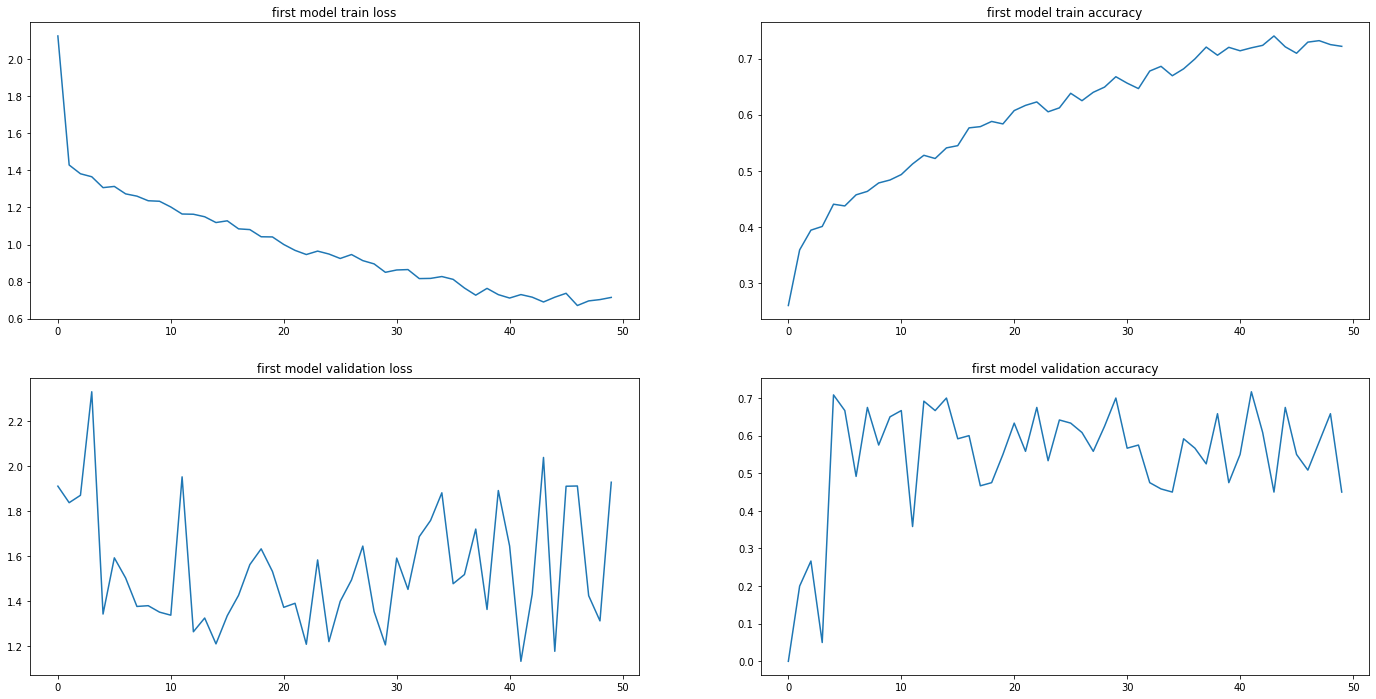

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(first_results.history["loss"])
ax[0][1].plot(first_results.history["accuracy"])
ax[1][0].plot(first_results.history["val_loss"])
ax[1][1].plot(first_results.history["val_accuracy"])

ax[0][0].set_title("first model train loss")
ax[0][1].set_title("first model train accuracy")
ax[1][0].set_title("first model validation loss")
ax[1][1].set_title("first model validation accuracy")
plt.show()